# Assessing the final model

In [1]:
import pandas as pd
from eli5.sklearn import PermutationImportance
import joblib 
from Functions import *

In [2]:
buffer_size_m=400

### Load the fitted model

In [3]:
rf_model_pipeline1 = joblib.load('Results/FinalModels/rf_model_pipeline1_{}.pkl'.format(buffer_size_m))
# rf_model_pipeline2 = joblib.load('Results/FinalModels/rf_model_pipeline2_{}.pkl'.format(buffer_size_m))
# rf_model_pipeline3 = joblib.load('Results/rf_model_pipeline3_combined_features.fit.sav')

### Load the data used to fit model

In [4]:
Xfull = pd.read_csv('Results/FinalModels/Xfull_rf_model_pipeline1_{}.csv'.format(buffer_size_m))
Yfull = pd.read_csv('Results/FinalModels/Yfull_rf_model_pipeline1_{}.csv'.format(buffer_size_m))
Yfull = Yfull["0"].to_numpy()

### Find Gini impurity feature importances
Gini feature importance (or mean decrease in impurity) counts the number of times a feature is used to split a node, weighted by the number of samples it splits.

In [5]:
len(Xfull.columns)    
# rf_importances = list(rf_model_pipeline1['rf_regressor'].feature_importances_)
# len(rf_importances)
# rf_importances
# rf_feature_importances = pd.DataFrame({'feature': Xfull.columns,'importance':rf_importances})   

67

In [6]:
gi_1 = find_gini_importance(Xfull,rf_model_pipeline1['rf_regressor'])    
# gi_2 = find_gini_importance(Xfull,rf_model_pipeline2['rf_regressor'])   
# gi_3 = find_gini_importance(Xfull,rf_model_pipeline3['rf_regressor'])   

### Find the permutation importances

In [26]:
pi_1, pi_1_raw = find_permutation_importance(rf_model_pipeline1['rf_regressor'], Xfull, Yfull, n_iter=3)    
# pi_2, pi_2_raw = find_permutation_importance(rf_model_pipeline2['rf_regressor'], Xfull, Yfull, n_iter=3)     
# pi_3, pi_3_raw = find_permutation_importance(rf_model_pipeline3['rf_regressor'], Xfull, Yfull, n_iter=3)  

### Plot and compare feature importances

In [8]:
# cardinality_df = pd.DataFrame({'feature':Xfull.columns, 'n_features':Xfull.nunique()})
# cardinality_df = cardinality_df.merge(pi_1, on='feature', how='outer')
# cardinality_df = cardinality_df.drop([0,1,2,4, 45])
# plt.scatter(cardinality_df['n_features'], cardinality_df['importance'])
# # plt.scatter(cardinality_df[:-2]['n_features'], cardinality_df[:-2]['importance'])
# # cardinality_df

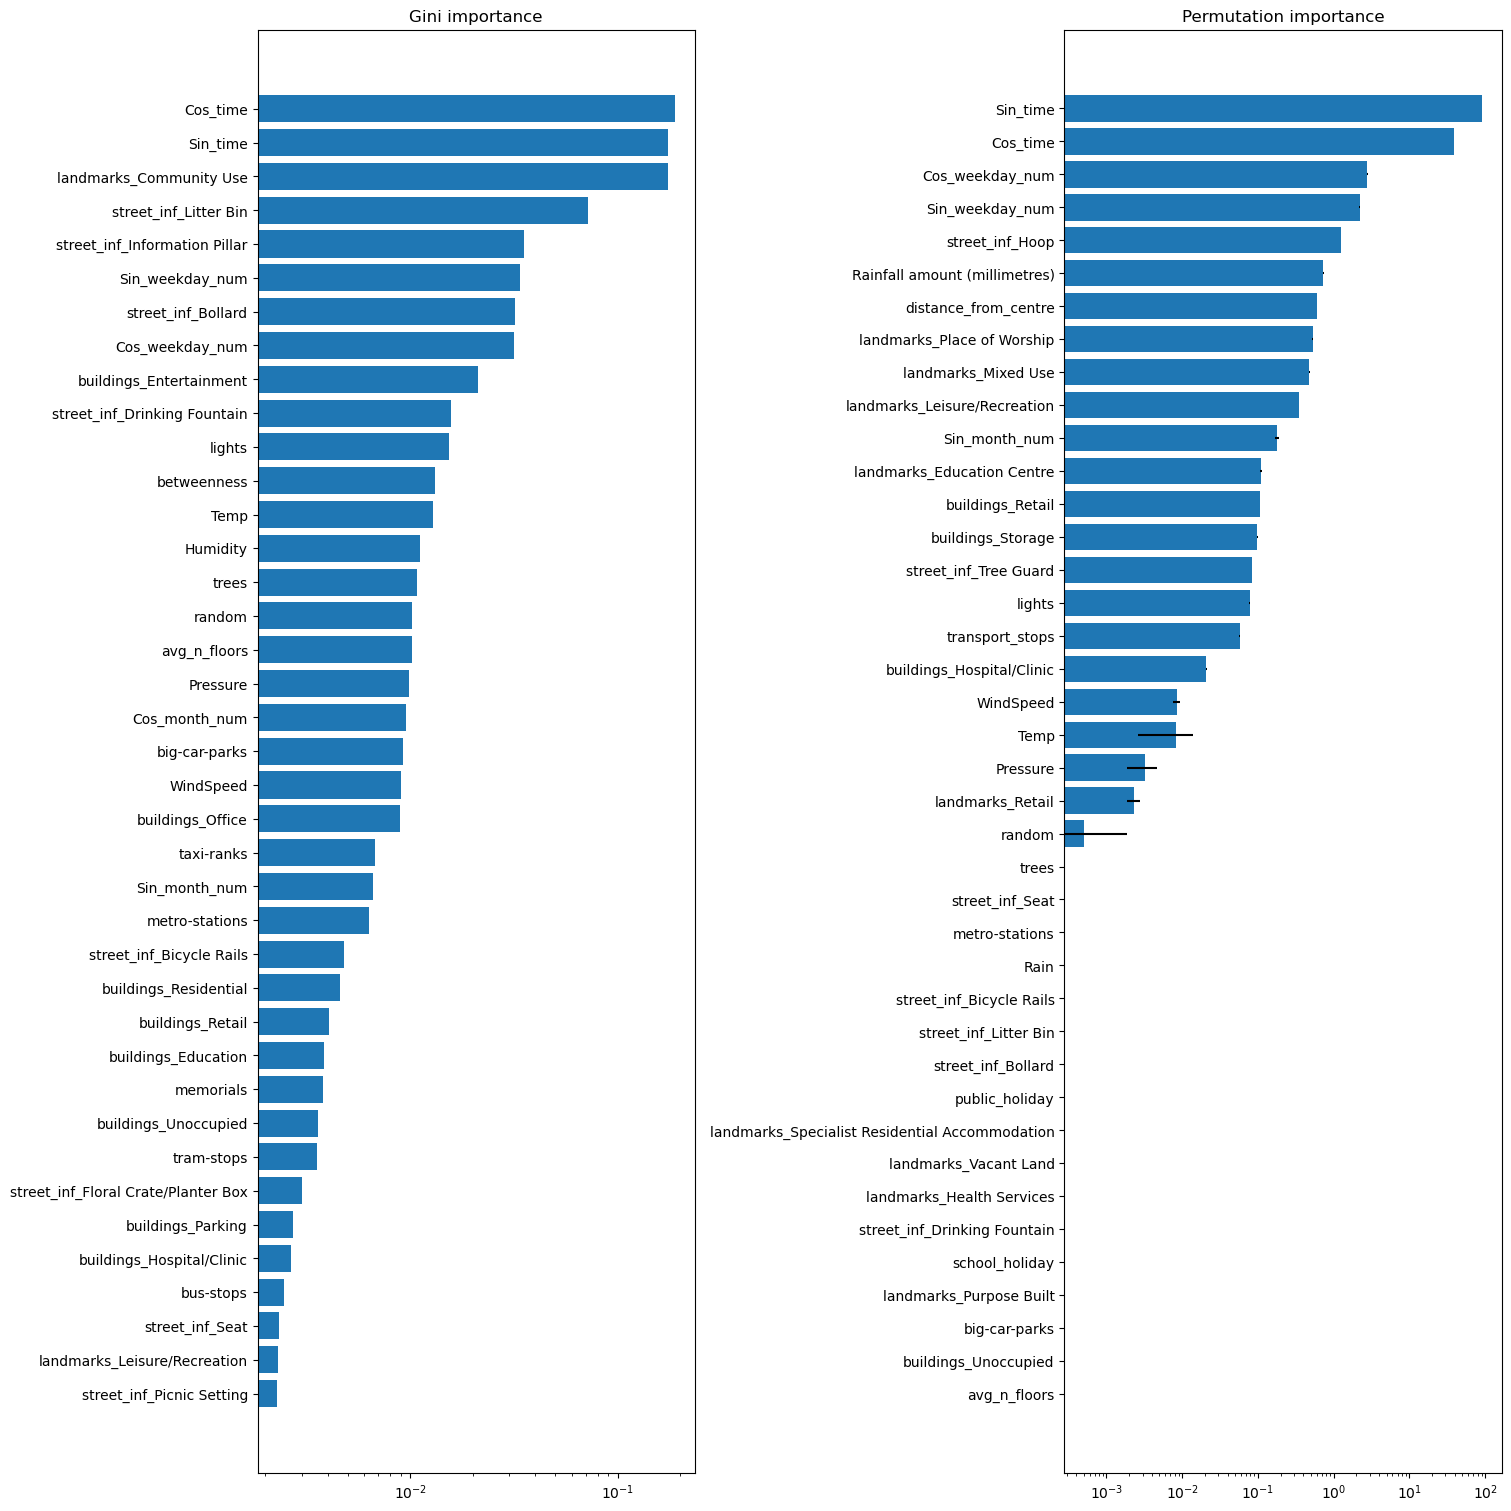

In [39]:
fig, axs = plt.subplots(ncols = 2, figsize=(15,15), constrained_layout=True)
plot_compare_importances(axs, gi_1, pi_1, log_scale = True, above_random_cat='random_cat')   
fig.savefig("Results/Figs/AssessingFinalModel/FeatureImportances_log.PNG")
# fig, axs = plt.subplots(ncols = 2, figsize=(15,8))
# plot_compare_importances(axs, gi_2, pi_2, above_random_cat='random_cat')   

# fig, axs = plt.subplots(ncols = 2, figsize=(15,8))
# plot_compare_importances(axs, gi_3, pi_3, above_random_cat='random_cat')   

In [17]:
# fig, axs = plt.subplots(ncols = 2, figsize=(15,15), constrained_layout=True)
# plot_compare_importances(axs, gi_1, pi_1, log_scale = False, above_random_cat='random_cat')   
# fig.savefig("Results/Figs/AssessingFinalModel/FeatureImportances.PNG")
# # fig, axs = plt.subplots(ncols = 2, figsize=(15,8))
# # plot_compare_importances(axs, gi_2, pi_2, above_random_cat='random_cat')   

# # fig, axs = plt.subplots(ncols = 2, figsize=(15,8))
# # plot_compare_importances(axs, gi_3, pi_3, above_random_cat='random_cat')   

#### Think if score is negative it implies that randomly shuffled version of the variable scored better than the real variable (so doesn't imply improtance)

In [27]:
pi_1

,feature,importance,Feature_importance_std
27,landmarks_Community Use,-13.272314,0.005889
36,street_inf_Picnic Setting,-1.682197,0.011324
23,street_inf_Information Pillar,-1.454431,0.000633
50,buildings_Parking,-0.496876,0.003833
38,street_inf_Barbeque,-0.328718,0.011151
...,...,...,...
35,street_inf_Hoop,1.253378,0.005361
62,Sin_weekday_num,2.224430,0.026055
63,Cos_weekday_num,2.805748,0.006646
59,Cos_time,38.788896,0.084298


In [35]:
pi_1_above= pi_1[pi_1['importance']>0.0005]
pi_1_above

,feature,importance,Feature_importance_std
65,random,0.000511,0.001360
31,landmarks_Retail,0.002300,0.000440
2,Pressure,0.003228,0.001374
0,Temp,0.008347,0.005710
4,WindSpeed,0.008548,0.000859
48,buildings_Hospital/Clinic,0.020957,0.000095
12,transport_stops,0.057950,0.000905
9,lights,0.077973,0.001234
26,street_inf_Tree Guard,0.083392,0.000631
53,buildings_Storage,0.097650,0.001622


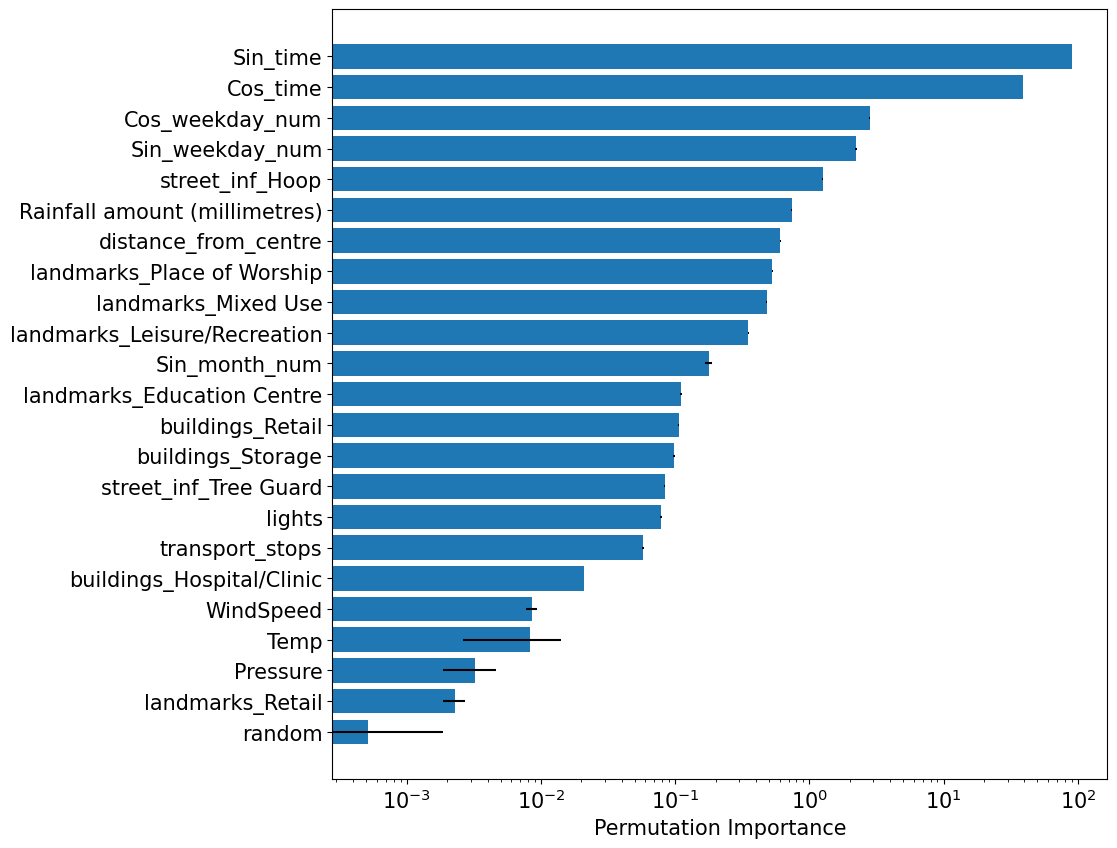

In [46]:
fig, ax=plt.subplots(figsize=(10,10))
ax.barh(range(len(pi_1_above['importance'])),pi_1_above['importance'],xerr=pi_1_above['Feature_importance_std'])
ax.set_yticks(range(len(pi_1_above['importance'])))
_ = ax.set_yticklabels(pi_1_above['feature'])  
# ax.set_title('Permutation importance')
ax.set_xscale('log')
ax.set_xlabel('Permutation Importance', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
fig.savefig("Results/Figs/AssessingFinalModel/FeatureImportances_log_removelittlevalues.PNG", bbox_inches='tight')